AttributeError: 'Legend' object has no attribute 'draggable'

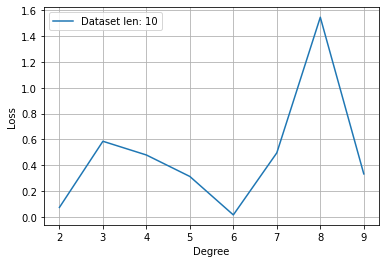

In [24]:
from collections import defaultdict
import plotly.graph_objs as go
from poly_regr import poly_regress
import numpy as np
from easyplot import EasyPlot

serieses = []
dataset_lens = [10, 100, 1000, 10000, 20000, 50000, 100000]
for degree in range(2, 10):
    for dataset_len in dataset_lens:
        loss, x_test, y_test, y_pred, coef_loss, poly_coefficients, model = \
            poly_regress(ground_degree=2, data_len=dataset_len)
        serieses.append((degree, dataset_len, loss, coef_loss))
        
data = defaultdict(list)
for degree, dataset_len, loss, coef_loss in serieses:
    data[dataset_len].append((degree, loss, coef_loss))

traces = []
plt = EasyPlot(showlegend=True, xlabel="Degree", ylabel="Loss", grid='on')
for dataset_len, xy_list in data.items():
    plt.add_plot([degree for degree, loss, coef_loss in xy_list], [loss for degree, loss, coef_loss in xy_list], label=f"Dataset len: {dataset_len}")
